In [1]:
import pandas as pd
import numpy as np

import matplotlib as plt
import seaborn as sns

In this homework, we will use the New York City Airbnb Open Data. 

The **goal of this homework** is to create a regression model for prediction apartment prices (column 'price').

## <font color='blue'>Load the data</font>

In [2]:
data = pd.read_csv('data/data-week2.csv', sep=',', decimal='.')

## <font color='blue'>Explore the data</font>

In [3]:
data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [4]:
data.describe(include='all')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,48879,4.889500e+04,48874,48895,48895,48895.000000,48895.000000,48895,48895.000000,48895.000000,48895.000000,38843,38843.000000,48895.000000,48895.000000
unique,NaN,47905,NaN,11452,5,221,NaN,NaN,3,NaN,NaN,NaN,1764,NaN,NaN,NaN
top,NaN,Hillside Hotel,NaN,Michael,Manhattan,Williamsburg,NaN,NaN,Entire home/apt,NaN,NaN,NaN,2019-06-23,NaN,NaN,NaN
freq,NaN,18,NaN,417,21661,3920,NaN,NaN,25409,NaN,NaN,NaN,1413,NaN,NaN,NaN
mean,1.901714e+07,NaN,6.762001e+07,NaN,NaN,NaN,40.728949,-73.952170,NaN,152.720687,7.029962,23.274466,NaN,1.373221,7.143982,112.781327
std,1.098311e+07,NaN,7.861097e+07,NaN,NaN,NaN,0.054530,0.046157,NaN,240.154170,20.510550,44.550582,NaN,1.680442,32.952519,131.622289
min,2.539000e+03,NaN,2.438000e+03,NaN,NaN,NaN,40.499790,-74.244420,NaN,0.000000,1.000000,0.000000,NaN,0.010000,1.000000,0.000000
25%,9.471945e+06,NaN,7.822033e+06,NaN,NaN,NaN,40.690100,-73.983070,NaN,69.000000,1.000000,1.000000,NaN,0.190000,1.000000,0.000000
50%,1.967728e+07,NaN,3.079382e+07,NaN,NaN,NaN,40.723070,-73.955680,NaN,106.000000,3.000000,5.000000,NaN,0.720000,1.000000,45.000000
75%,2.915218e+07,NaN,1.074344e+08,NaN,NaN,NaN,40.763115,-73.936275,NaN,175.000000,5.000000,24.000000,NaN,2.020000,2.000000,227.000000


In [5]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

## <font color='blue'>Plot the `price` variable</font>

In [6]:
y = data['price']

<AxesSubplot:xlabel='price', ylabel='Count'>

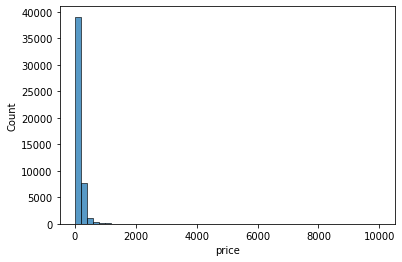

In [7]:
sns.histplot(y, bins=50)

### Does it have a long tail?

<font color='red'>YES</font>

So we will use log1n on the values.

## <font color='blue'>Remove longtail on the `price` values</font>

In [8]:
y.describe()

count    48895.000000
mean       152.720687
std        240.154170
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [9]:
y_log = np.log1p(y)

In [10]:
y_log.describe()

count    48895.000000
mean         4.736885
std          0.695344
min          0.000000
25%          4.248495
50%          4.672829
75%          5.170484
max          9.210440
Name: price, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

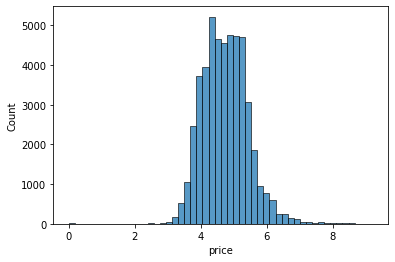

In [11]:
sns.histplot(y_log, bins=50)

## <font color='blue'>Prepare the data</font>

In [12]:
selected_cols = [
    'latitude',
    'longitude',
    'price',
    'minimum_nights',
    'number_of_reviews',
    'reviews_per_month',
    'calculated_host_listings_count',
    'availability_365',
]

In [13]:
df = data[selected_cols]

### <font color='green'>Question 1</font>

Find a feature with missing values. How many missing values does it have?

In [14]:
df.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<font color='red'>ANSWER: </font> `reviews_per_month` is missing 10052 values

### <font color='green'>Question 2</font>

What's the median (50% percentile) for variable 'minimum_nights'?

In [15]:
df['minimum_nights'].median()

3.0

In [16]:
df['minimum_nights'].describe()

count    48895.000000
mean         7.029962
std         20.510550
min          1.000000
25%          1.000000
50%          3.000000
75%          5.000000
max       1250.000000
Name: minimum_nights, dtype: float64

<font color='red'>ANSWER: </font> the median for `minimum_nights` is 3.0

## <font color='blue'>Split the Data</font>


- Shuffle the initial dataset, use seed 42.
- Split your data in train/val/test sets, with 60%/20%/20% distribution.
- Make sure that the target value ('price') is not in your dataframe.
- Apply the log transformation to the price variable using the np.log1p() function.

In [17]:
def split_train_valid_test(df, train_percent, valid_percent, test_percent, seed_value=42):
    assert (train_percent + valid_percent + test_percent) == 100
    
    # Define sets size
    n_total = df.shape[0]
    
    n_testing = int(n_total/100*test_percent)
    n_validation = int(n_total/100*valid_percent)
    n_training = n_total - n_validation - n_testing
    
    train_index = 0
    valid_index = n_training
    tests_index = valid_index + n_validation

    print(f"n_training: {n_training} / n_validation: {n_validation} / n_testing: {n_testing}")
    print(f"n_total:{n_total} vs sum:{n_validation + n_testing + n_training}\n")
    
    # Initialize randomness
    idx = np.arange(n_total)
    np.random.seed(seed_value)
    np.random.shuffle(idx)
    
    print(idx[:3])
    
    # Split X    
    df_train = df.iloc[idx[train_index:valid_index]]
    df_valid = df.iloc[idx[valid_index:tests_index]]
    df_tests = df.iloc[idx[tests_index:]]
    
    print(df_train.head(3))
    
    splits_X = [df_train, df_valid, df_tests]
    splits_y = []
    
    for split in splits_X:
        # Reset X indexes
        split.reset_index(drop=True)
    
        # Create y sets
        y_split = split['price']
    
        # Log the prices
        y_split = np.log1p(y_split)
        
        # Add to splits_y 
        splits_y.append(y_split)
        
        # Remove 'price' from X
        del split['price']
            
    return *splits_X, *splits_y


In [18]:
df_training, df_validation, df_testing, \
y_training, y_validation, y_testing = split_train_valid_test(df, 60, 20, 20)

n_training: 29337 / n_validation: 9779 / n_testing: 9779
n_total:48895 vs sum:48895

[  879 44383 15394]
       latitude  longitude  price  minimum_nights  number_of_reviews  \
879    40.64354  -73.97777     89               3                 62   
44383  40.70666  -73.90779     30              21                  0   
15394  40.76116  -73.99016    120               2                 17   

       reviews_per_month  calculated_host_listings_count  availability_365  
879                 0.71                               1               189  
44383                NaN                               1                73  
15394               0.43                               1                 0  


In [19]:
df_training.shape, df_validation.shape, df_testing.shape, y_testing.shape, y_validation.shape, y_testing.shape

((29337, 7), (9779, 7), (9779, 7), (9779,), (9779,), (9779,))

In [20]:
df_training.head()

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,3,62,0.71,1,189
44383,40.70666,-73.90779,21,0,NaN,1,73
15394,40.76116,-73.99016,2,17,0.43,1,0
43230,40.70763,-74.01050,2,5,1.88,327,272
16332,40.79658,-73.93287,2,30,0.80,1,30


In [21]:
y_training

879      4.499810
44383    3.433987
15394    4.795791
43230    6.154858
16332    5.298317
           ...   
14975    4.564348
14661    4.624973
24515    4.615121
31460    4.234107
29114    3.828641
Name: price, Length: 29337, dtype: float64

### <font color='green'>Question 3</font>

- We need to deal with missing values for the column from Q1.
- We have two options: fill it with 0 or with the mean of this variable.
- Try both options. For each, train a linear regression model without regularization using the code from the lessons.
- For computing the mean, use the training only!
- Use the validation dataset to evaluate the models and compare the RMSE of each option.
- Round the RMSE scores to 2 decimal digits using round(score, 2)

Which option gives better RMSE?

In [22]:
def train_linear_regression(X, y):
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    gram_matrix = np.dot(X.T,X)
    inv_matrix = np.linalg.inv(gram_matrix)
    
    #theta = np.dot(inv_matrix, np.dot(X.T, y))
    theta = inv_matrix.dot(X.T).dot(y)
    return theta[0], theta[1:]

In [23]:
def RMSE(y_true, y_pred):
    se = (y_true - y_pred)**2
    mse = np.mean(se)
    return np.sqrt(mse)

#### Filling with `0`

In [24]:
def prepare_X(df):
    df = df.copy()
    
    df_num = df.fillna(0)
    
    return df_num.values

In [25]:
X_training = prepare_X(df_training)
X_validation = prepare_X(df_validation)

In [26]:
theta0, thetas = train_linear_regression(X_training, y_training)

In [27]:
y_pred = theta0 + np.dot(X_validation, thetas)

In [28]:
round(RMSE(y_validation, y_pred), 2)

0.64

#### Filling with `mean`

In [29]:
def prepare_X(df):
    df = df.copy()
    
    mean_reviews_per_month = np.mean(df_training['reviews_per_month'])
    
    df_num = df.fillna(mean_reviews_per_month)
    
    return df_num.values

In [30]:
X_training = prepare_X(df_training)
X_validation = prepare_X(df_validation)

In [31]:
theta0, thetas = train_linear_regression(X_training, y_training)

In [32]:
y_pred = theta0 + np.dot(X_validation, thetas)

In [33]:
round(RMSE(y_validation, y_pred), 2)

0.64

<font color='red'>ANSWER:</font> both models return an RMSE of 0.64

### <font color='green'>Question 4</font>

- Now let's train a regularized linear regression.
- For this question, fill the NAs with 0.
- Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
- Use RMSE to evaluate the model on the validation dataset.
- Round the RMSE scores to 2 decimal digits.
- Which r gives the best RMSE?

If there are multiple options, select the smallest r.

In [34]:
def prepare_X(df):
    df = df.copy()
    
    #df_num = df[selected_cols]
    df_num = df.fillna(0)
    
    return df_num.values

In [35]:
def train_linear_regression_reg(X, y, lamb):
    
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])
    
    gram_matrix = np.dot(X.T,X)
    regulized_matrix = gram_matrix + np.eye(gram_matrix.shape[0]) * lamb
    inv_matrix = np.linalg.inv(regulized_matrix)
    
    theta = np.dot(inv_matrix, np.dot(X.T, y))
    return theta[0], theta[1:]

In [36]:
def search_reg_lambda(X_train, X_valid, y_train, y_valid):
    lambdas = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

    for lamb in lambdas:
        theta0, thetas = train_linear_regression_reg(X_train, y_train, lamb)
        y_pred = theta0 + np.dot(X_valid, thetas)
        print(f"lambda: {lamb:8} -- theta0: {theta0:.8} -- RMSE: {round(RMSE(y_valid, y_pred), 2)}")

In [37]:
X_training = prepare_X(df_training)
X_validation = prepare_X(df_validation)

In [38]:
search_reg_lambda(X_training, X_validation, y_training, y_validation)

lambda:        0 -- theta0: -419.91266 -- RMSE: 0.64
lambda:    1e-06 -- theta0: -419.86272 -- RMSE: 0.64
lambda:   0.0001 -- theta0: -414.97649 -- RMSE: 0.64
lambda:    0.001 -- theta0: -375.27365 -- RMSE: 0.64
lambda:     0.01 -- theta0: -191.78384 -- RMSE: 0.66
lambda:      0.1 -- theta0: -32.562561 -- RMSE: 0.68
lambda:        1 -- theta0: -3.4992168 -- RMSE: 0.68
lambda:        5 -- theta0: -0.70336232 -- RMSE: 0.68
lambda:       10 -- theta0: -0.35127676 -- RMSE: 0.68


<font color='red'>ANSWER: </font> The best lamba seems to be 0.001 because the RMSE is low (0.64) and this is the larger one on this value (so this lambda value will converge faster)

### <font color='green'>Question 5</font>

- We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
- Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
- For each seed, do the train/validation/test split with 60%/20%/20% distribution.
- Fill the missing values with 0 and train a model without regularization.
- For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
- What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
- Round the result to 3 decimal digits (round(std, 3))

Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.


In [39]:
def prepare_X(df):
    df = df.copy()
    
    df_num = df.fillna(0)
    
    return df_num.values

In [40]:
def test_seeds():
    seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    
    rmse_values = []
    
    for seed in seeds:
        df_training, df_validation, df_testing, \
        y_training, y_validation, y_testing = split_train_valid_test(df, 60, 20, 20, seed)
        
        X_training = prepare_X(df_training)
        X_validation = prepare_X(df_validation)
        
        theta0, thetas = train_linear_regression(X_training, y_training)
        y_pred = theta0 + np.dot(X_validation, thetas)
        rmse = RMSE(y_validation, y_pred)
        
        print(f"\n{20*'*'} seed: {seed} -- RMSE: {round(rmse,2)} {20*'*'}\n\n")
        rmse_values.append(rmse)
        
    print(f"std rmse: {round(np.std(rmse_values),3)}")
        
test_seeds()

n_training: 29337 / n_validation: 9779 / n_testing: 9779
n_total:48895 vs sum:48895

[43813 32734 25276]
       latitude  longitude  price  minimum_nights  number_of_reviews  \
43813  40.72430  -74.01110    225               3                  0   
32734  40.72555  -73.99283    649               1                  5   
25276  40.71687  -73.95012    300               5                  5   

       reviews_per_month  calculated_host_listings_count  availability_365  
43813                NaN                               1                42  
32734               0.40                               1                75  
25276               0.35                               3                31  

******************** seed: 0 -- RMSE: 0.65 ********************


n_training: 29337 / n_validation: 9779 / n_testing: 9779
n_total:48895 vs sum:48895

[18907 46663 19757]
       latitude  longitude  price  minimum_nights  number_of_reviews  \
18907  40.74596  -73.87762     60               2     

### <font color='green'>Question 6</font>

- Split the dataset like previously, use seed 9.
- Combine train and validation datasets.
- Fill the missing values with 0 and train a model with r=0.001.

What's the RMSE on the test dataset?


In [41]:
def prepare_X(df):
    df = df.copy()
    
    df_num = df.fillna(0)
    
    return df_num.values

In [42]:
df_training, df_validation, df_testing, \
y_training, y_validation, y_testing = split_train_valid_test(df, 60, 20, 20, 9)

df_train_valid = pd.concat([df_training, df_validation])
df_train_valid = df_train_valid.reset_index(drop=True)
y_train_valid = pd.concat([y_training, y_validation])
y_train_valid = y_train_valid.reset_index(drop=True)

print("Blop", y_train_valid)

X_training = prepare_X(df_train_valid)
X_testing = prepare_X(df_testing)
        
theta0, thetas = train_linear_regression_reg(X_training, y_train_valid, 0.001)
y_pred = theta0 + np.dot(X_testing, thetas)
print(f"RMSE: {round(RMSE(y_testing, y_pred),2)}")

n_training: 29337 / n_validation: 9779 / n_testing: 9779
n_total:48895 vs sum:48895

[25415  1329 31738]
       latitude  longitude  price  minimum_nights  number_of_reviews  \
25415  40.70423  -73.91595     75               1                  3   
1329   40.77115  -73.92275     69              40                 23   
31738  40.70401  -74.00932    179              29                  0   

       reviews_per_month  calculated_host_listings_count  availability_365  
25415               0.13                               1                 0  
1329                0.27                               1               207  
31738                NaN                              96                 1  
Blop 0        4.330733
1        4.248495
2        5.192957
3        5.017280
4        4.110874
           ...   
39111    4.510860
39112    4.859812
39113    4.948760
39114    5.375278
39115    4.189655
Name: price, Length: 39116, dtype: float64
RMSE: 0.65
